## Les librairie utilisées 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des fichiers/ données de mobilité du Grand Poitiers 

In [2]:
agency = pd.read_csv("agency.txt")
stops = pd.read_csv("stops.txt")
routes = pd.read_csv("routes.txt")
trips = pd.read_csv("trips.txt")
stop_times = pd.read_csv("stop_times.txt")
calendar = pd.read_csv("calendar.txt")
calendar_dates = pd.read_csv("calendar_dates.txt")


## Nettoyage et converstion

In [3]:
#  les heures en format "durée"
stop_times["arrival_time"] = pd.to_timedelta(stop_times["arrival_time"], errors='coerce')
stop_times["departure_time"] = pd.to_timedelta(stop_times["departure_time"], errors='coerce')

# suppression des lignes où il manque des horaires
stop_times.dropna(subset=["arrival_time", "departure_time"], inplace=True)

#### En fonction du MCD/MLD que nous avons fait,les données des trajets et des arrêt peuvent etre merger ensemble afin de nous permettre de mieux gérer les fichiers et croiser les données entre elle ( à complèter) 

In [4]:
# On relie les horaires (stop_times) aux trajets (trips)
merged = stop_times.merge(trips, on="trip_id")
merged = merged.merge(routes, on="route_id") # ajoute le nom de la ligne (routes)
gtfs_full_schedule = merged.merge(stops, on="stop_id")# ajoute les infos sur les arrêts (stops)

In [5]:
#print(gtfs_full_schedule.head())

#### gtfs_full_schedule contient 
 ##### route_short_name ou route_long_name → le nom de la ligne de bus, 
 ##### stop_name → le nom de l’arrêt,
 ##### arrival_time, departure_time → les horaires,
 ##### stop_lat, stop_lon → les coordonnées GPS.

#### Lors de la fusion des données, certaines colonnes sont apparues en double. Pour obtenir des colonnes uniques avec des noms clairs, je vais supprimer les doublons et renommer les colonnes restantes.

In [6]:
# supprimer les _y
#gtfs_full_schedule = gtfs_full_schedule.drop(columns=[
    #'agency_id_y', 'route_short_name_y', 'route_long_name_y',
    #'route_desc_y', 'route_type_y', 'route_color_y', 'route_text_color_y',
    #'stop_code_y', 'stop_name_y', 'stop_desc_y', 'stop_lat_y', 'stop_lon_y',
    #'location_type_y', 'parent_station_y', 'wheelchair_boarding_y'])

In [7]:
#  Renommer les colonnes en enlevant le '_x'
gtfs_full_schedule.rename(columns={
    'agency_id_x': 'agency_id',
    'route_short_name_x': 'route_short_name',
    'route_long_name_x': 'route_long_name',
    'route_desc_x': 'route_desc',
    'route_type_x': 'route_type',
    'route_color_x': 'route_color',
    'route_text_color_x': 'route_text_color',
    'stop_code_x': 'stop_code',
    'stop_name_x': 'stop_name',
    'stop_desc_x': 'stop_desc',
    'stop_lat_x': 'stop_lat',
    'stop_lon_x': 'stop_lon',
    'location_type_x': 'location_type',
    'parent_station_x': 'parent_station',
    'wheelchair_boarding_x': 'wheelchair_boarding'
}, inplace=True)

In [8]:
#print(gtfs_full_schedule.columns)

In [9]:
#df= pd.DataFrame(gtfs_full_schedule)
#df.to_csv("gtfs_full_schedule")

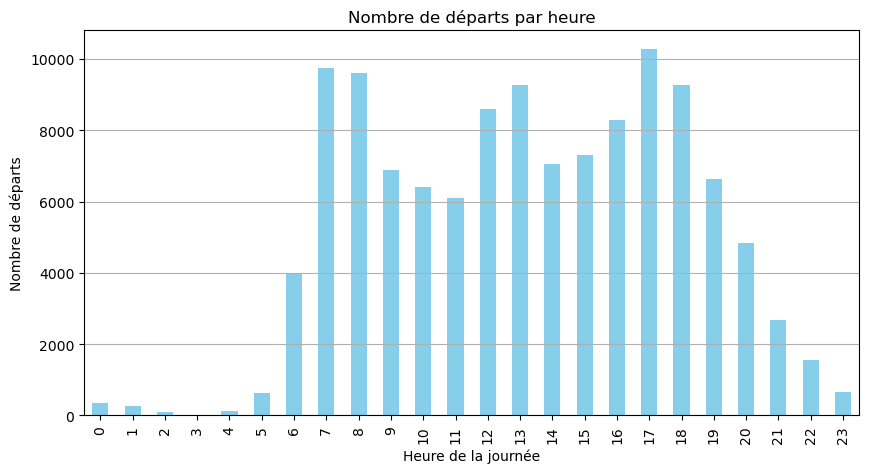

In [10]:
# Extraire l'heure depuis departure_time
gtfs_full_schedule['departure_hour'] = gtfs_full_schedule['departure_time'].dt.components['hours']

# Compter le nombre de trajets par heure
hourly_counts = gtfs_full_schedule['departure_hour'].value_counts().sort_index()

# Afficher un graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title("Nombre de départs par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de départs")
plt.grid(axis='y')
plt.show()
